In [1]:
#simulacao de monte carlo: calculando PI

In [2]:
n_sim <- 100000

x <- runif(n_sim,min=-0.5,max=0.5)
y <- runif(n_sim,min=-0.5,max=0.5)

In [3]:
dentro_circulo <- x^2 + y^2 <= 0.5^2

pi_monte_carlo <- (sum(dentro_circulo)/n_sim)*4

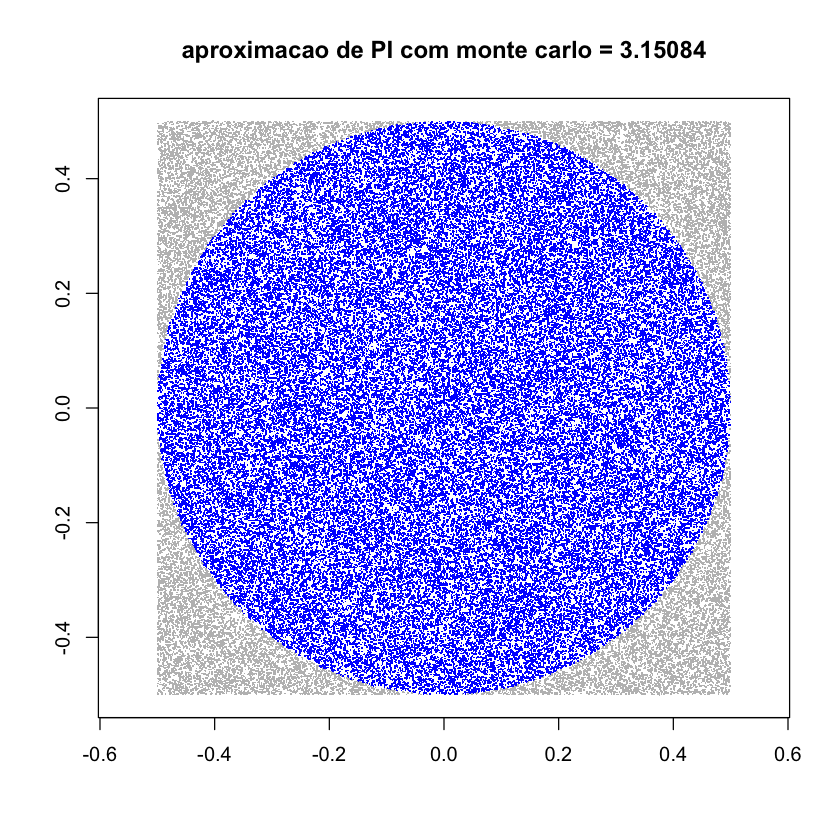

In [4]:
plot(x,y,pch='.',col=ifelse(dentro_circulo,"blue","grey")
     ,xlab='',ylab='',asp=1,
     main=paste("aproximacao de PI com monte carlo =",pi_monte_carlo))

In [5]:
#parametros do processo

#retorno anual esperado - 23%
u <- 0.25   

#desvio padrao anual esperado - 15%
sd <- 0.20   

In [6]:
#parametros do tempo
periodo <- 1:256   

In [7]:
n_sim <- 1000
total_sim <- matrix(0, nrow = 256, ncol = n_sim)
p_inicial <- 10   

In [8]:
for(j in 1:n_sim) {
  aux <- 2
  p <- p_inicial #Preco inicial
  preco <- c(p) #Vetor para acumular os precos ao longo do tempo
  dist <- rnorm(255,0,1) #Distribuicao normal, 255 valores, com media 0 e desvio p. 1
  for(i in dist)
  {
    P = p + p*(u/255 + sd/sqrt(255)*i)
    preco[aux] <- P                        
    p = P                                 
    aux = aux + 1
  }
  total_sim[,j] <- preco
}  

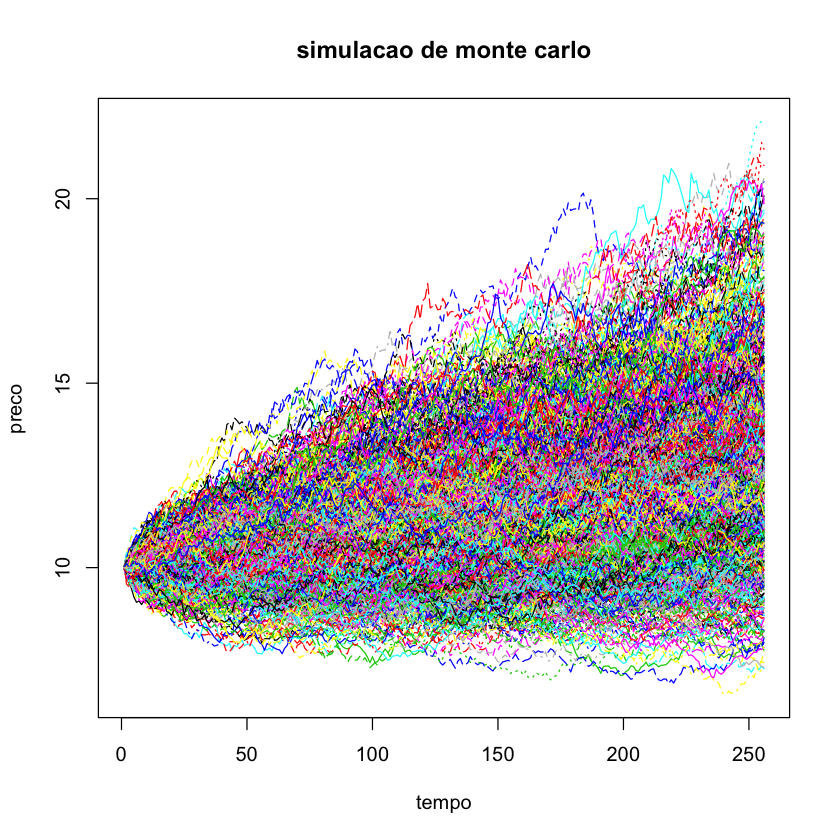

In [10]:
matplot(total_sim,main="simulacao de monte carlo",xlab="tempo",ylab="preco", type="l",col=1:n_sim)

In [12]:
#percentis de 5% e 95%  
round(quantile(total_sim,probs=c(0.05,0.95)),2)
#5% dos precos simulados são menores que X e 95% dos retornos são menores que Y

5%   95% 
 9.05 14.98

In [13]:
round(min(total_sim),2)

[1] 6.56

In [14]:
#Value at Risk - VaR
round((1-p_inicial/quantile(total_sim,probs=c(0.01,0.05)))*100,2)

#uma perda de X% ou mais com 1% de probabilidade ou Y% ou mais com 5% de probabilidade

1%     5% 
-21.43 -10.51